In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # charts plotting
import plotly.graph_objects as go # more customized plotting

In [12]:
df_retail = pd.read_csv('/content/drive/MyDrive/Spinmaster/OnlineRetail.csv')
df_retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom


In [14]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [15]:
# Initial Data Cleaning
df_retail['InvoiceDate'] = pd.to_datetime(df_uk_filtered['InvoiceDate'])
df_retail = df_retail[df_retail['CustomerID'].notna()]
df_retail['CustomerID'] = df_retail['CustomerID'].astype(int)
df_retail = df_retail.sort_values('InvoiceDate')
df_retail['Total'] = df_retail['Quantity'] * df_retail['UnitPrice']
df_retail.head(5)

<ipython-input-15-338f18863b44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['CustomerID'] = df_retail['CustomerID'].astype(int)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047,United Kingdom,25.50
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850,United Kingdom,15.30


In [16]:
# Target Data - UK and Top 20 Items in total revenue
df_uk = df_retail.loc[df_retail["Country"]== "United Kingdom"]
df_target = df_uk.groupby(["StockCode","Description"])["Total"].agg({"sum"}).sort_values('sum',ascending=False).head(20)
df_target.rename(columns={'sum': 'Revenue'}, inplace=True)
df_target.reset_index(level=['StockCode', 'Description'],inplace=True)
df_target

,StockCode,Description,Revenue
0,22423,REGENCY CAKESTAND 3 TIER,103122.85
1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,88313.95
2,85099B,JUMBO BAG RED RETROSPOT,75416.67
3,47566,PARTY BUNTING,61952.58
4,84879,ASSORTED COLOUR BIRD ORNAMENT,52314.87
5,79321,CHILLI LIGHTS,45155.61
6,22502,PICNIC BASKET WICKER 60 PIECES,39619.50
7,22086,PAPER CHAIN KIT 50'S CHRISTMAS,39596.73
8,21137,BLACK RECORD COVER FRAME,37799.42
9,82484,WOOD BLACK BOARD ANT WHITE FINISH,33408.76


In [17]:
# Target Data
print(df_uk.shape)
df_target_data = df_uk[df_uk['StockCode'].isin(df_target['StockCode'])]
print(df_target_data.shape)
print(df_target_data['StockCode'].value_counts())
df_target_data.head(5)

(361878, 9)
(18648, 9)
StockCode
85123A    1987
22423     1574
85099B    1505
84879     1343
47566     1327
22720     1080
22086      991
22469      963
23298      939
22386      844
22960      829
22470      825
22178      818
22910      704
85099F     645
23284      630
82484      585
79321      519
21137      304
22502      236
Name: count, dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047,United Kingdom,25.50
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850,United Kingdom,15.30


In [18]:
df_target_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18648 entries, 0 to 541875
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    18648 non-null  object        
 1   StockCode    18648 non-null  object        
 2   Description  18648 non-null  object        
 3   Quantity     18648 non-null  int64         
 4   InvoiceDate  18648 non-null  datetime64[ns]
 5   UnitPrice    18648 non-null  float64       
 6   CustomerID   18648 non-null  int64         
 7   Country      18648 non-null  object        
 8   Total        18648 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.4+ MB


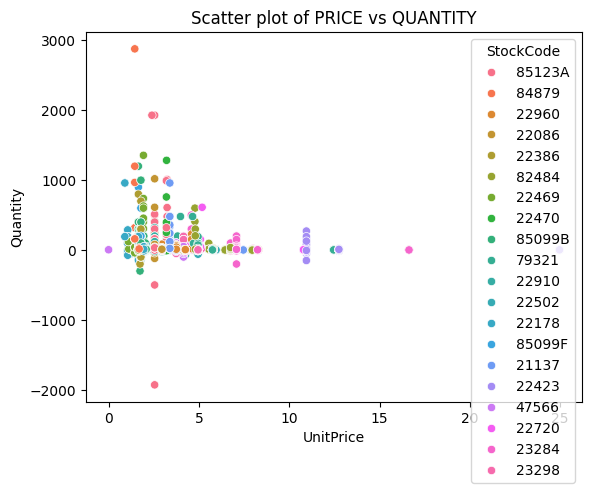

In [22]:
# Relationship between Price and Quantity
d1 = df_target_data[df_target_data["UnitPrice"]<100]
sns.scatterplot(x='UnitPrice', y='Quantity', data=d1, hue='StockCode')
plt.xlabel('UnitPrice')
plt.ylabel('Quantity')
plt.title('Scatter plot of PRICE vs QUANTITY')
plt.show();

It shows the non linear relationship between price and quantity for these 20 products

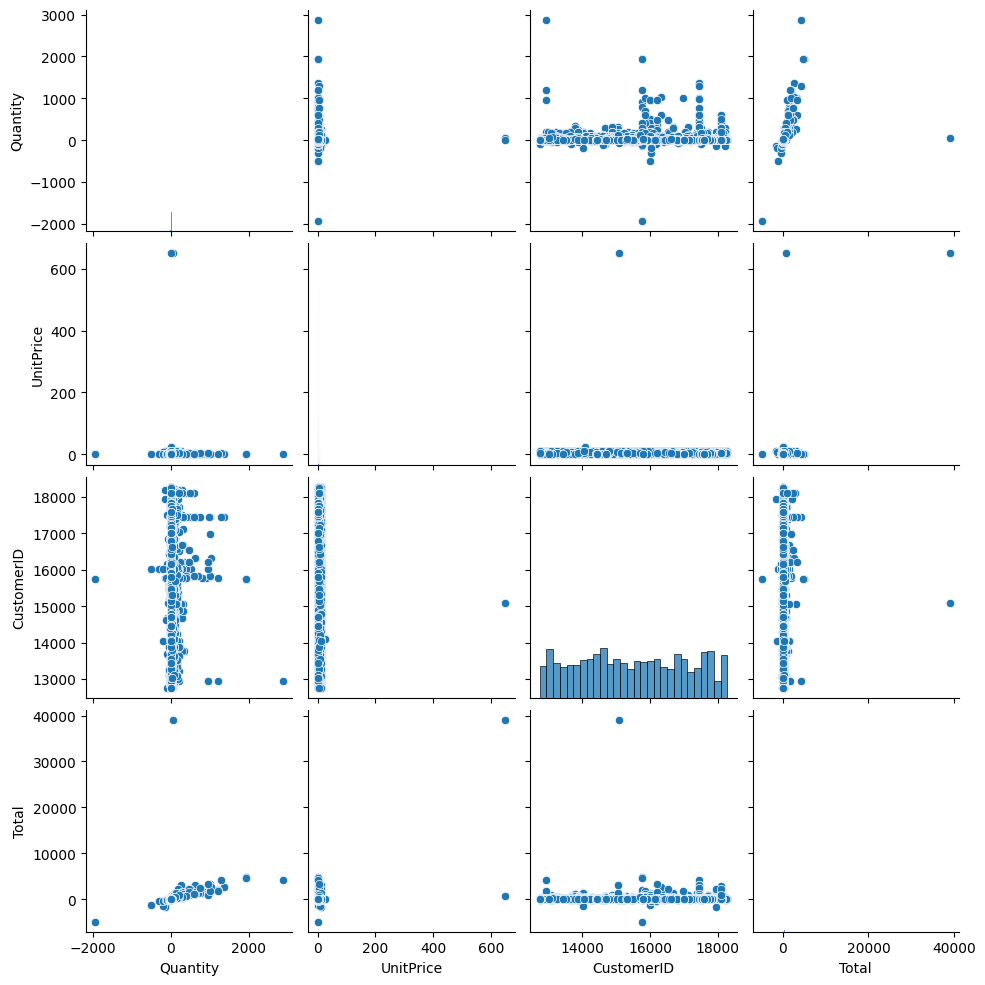

In [23]:
sns.pairplot(df_target_data)

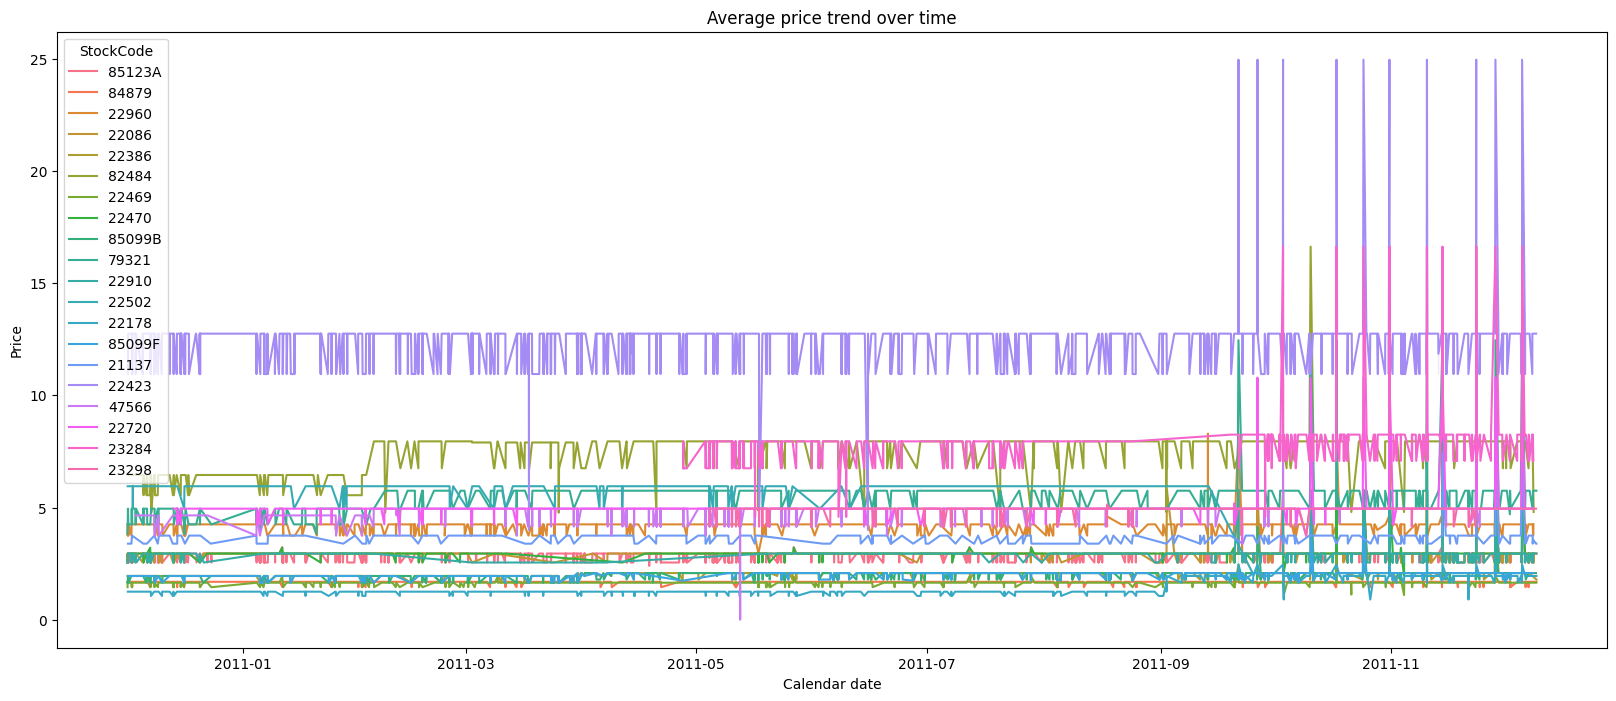

In [29]:
plt.figure(figsize=(20,8))
#plt.plot(grouped_transaction['CALENDAR_DATE'], grouped_transaction['PRICE'])
sns.lineplot(x = 'InvoiceDate', y = 'UnitPrice', data = d1, hue='StockCode')
plt.xlabel('Calendar date')
plt.ylabel('Price')
plt.title('Average price trend over time')
plt.show();

In [25]:
# Assuming 'InvoiceDate' is already a datetime column as per your previous code
df_target_data['InvoiceDayOfWeek'] = df_target_data['InvoiceDate'].dt.dayofweek
# Monday=0, Sunday=6
df_target_data['IsWeekend'] = df_target_data['InvoiceDayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
df_target_data.head(5)

<ipython-input-25-83a9f58c75cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_data['InvoiceDayOfWeek'] = df_target_data['InvoiceDate'].dt.dayofweek
<ipython-input-25-83a9f58c75cc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_data['IsWeekend'] = df_target_data['InvoiceDayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,InvoiceDayOfWeek,IsWeekend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2,0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2,0
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047,United Kingdom,25.50,2,0
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00,2,0
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850,United Kingdom,15.30,2,0


In [26]:
df_target_data['IsWeekend'].value_counts()

,count
IsWeekend,
0,15888
1,2760


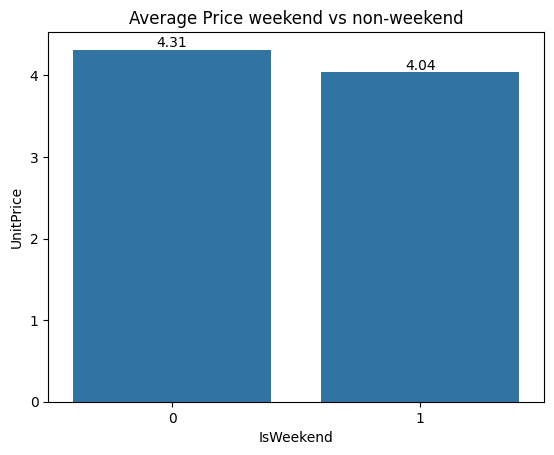

In [30]:
weekend_data = df_target_data.groupby('IsWeekend').UnitPrice.mean().reset_index()
sns.barplot(x='IsWeekend', y='UnitPrice', data=weekend_data)
for index, value in enumerate(weekend_data['UnitPrice']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.title('Average Price weekend vs non-weekend')
plt.show();

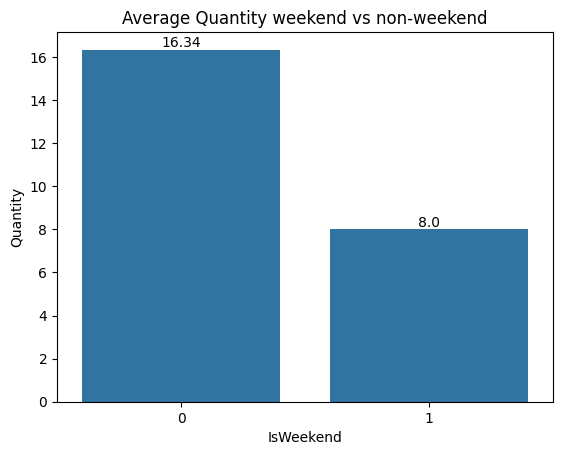

In [32]:
weekend_data = df_target_data.groupby('IsWeekend').Quantity.mean().reset_index()
sns.barplot(x='IsWeekend', y='Quantity', data=weekend_data)
for index, value in enumerate(weekend_data['Quantity']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.title('Average Quantity weekend vs non-weekend')
plt.show();

In [36]:
df_target_data['InvoiceMonth'] = df_target_data['InvoiceDate'].dt.month
df_target_data.head(5)

<ipython-input-36-d7a88af4b623>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_data['InvoiceMonth'] = df_target_data['InvoiceDate'].dt.month


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,InvoiceDayOfWeek,IsWeekend,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2,0,12
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,2,0,12
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047,United Kingdom,25.50,2,0,12
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00,2,0,12
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850,United Kingdom,15.30,2,0,12


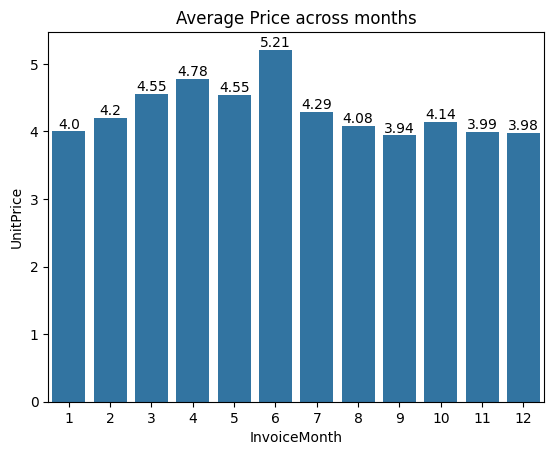

In [37]:
monthly_data = df_target_data.groupby('InvoiceMonth').UnitPrice.mean().reset_index()
sns.barplot(x='InvoiceMonth', y='UnitPrice', data=monthly_data)
for index, value in enumerate(monthly_data['UnitPrice']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.title('Average Price across months')
plt.show();

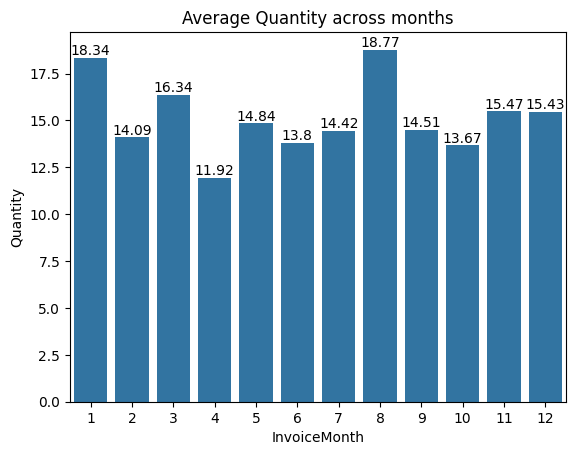

In [38]:
monthly_data = df_target_data.groupby('InvoiceMonth').Quantity.mean().reset_index()
sns.barplot(x='InvoiceMonth', y='Quantity', data=monthly_data)
for index, value in enumerate(monthly_data['Quantity']):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')
plt.title('Average Quantity across months')
plt.show();